In [2]:
!pip list

Package                  Version
------------------------ -----------
absl-py                  2.1.0
aiohttp                  3.9.3
aiosignal                1.3.1
annotated-types          0.6.0
anyio                    4.3.0
appnope                  0.1.4
asttokens                2.4.1
attrs                    23.2.0
Brotli                   1.0.9
certifi                  2025.1.31
cffi                     1.16.0
charset-normalizer       3.3.2
comm                     0.2.2
contourpy                1.2.0
cryptography             42.0.5
cycler                   0.11.0
dataclasses-json         0.6.4
debugpy                  1.6.7
decorator                5.1.1
distro                   1.9.0
et-xmlfile               1.1.0
exceptiongroup           1.2.0
executing                2.0.1
filelock                 3.13.3
fonttools                4.51.0
frozenlist               1.4.1
fsspec                   2024.3.1
future                   1.0.0
globus-sdk               3.39.0
greenlet         

In [4]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

In [15]:
car_df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
print(car_df.shape)
display(car_df.head(10))

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


Exploratory Data Analysis

In [35]:
# Consistency in text
car_df.columns = car_df.columns.str.lower().str.replace(" ", "_")

string_cols = list(car_df.dtypes[car_df.dtypes == "object"].index)
# print(string_cols)

for col in string_cols:
    car_df[col] = car_df[col].str.lower().str.replace(" ", "_")

car_df.dropna(inplace=True)

# Unique values from each column
for col in car_df.columns:
    print(col)
    print(car_df[col].unique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'mclaren' 'maybach' 'porsche'
 'toyota' 'saab' 'gmc' 'hyundai' 'honda' 'cadillac' 'bentley' 'ford'
 'oldsmobile' 'chevrolet' 'dodge' 'lamborghini' 'lincoln' 'pontiac'
 'subaru' 'volkswagen' 'spyker' 'kia' 'acura' 'plymouth' 'rolls-royce'
 'maserati' 'lexus' 'aston_martin' 'land_rover' 'lotus' 'buick' 'infiniti'
 'scion' 'genesis' 'suzuki' 'hummer' 'bugatti']

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '5_series_gran_turismo' '5_series' '500-class' '500'
 '500x' '550' '560-class' '570s' '575m' '57' '599' '6_series_gran_coupe'
 '6_series' '600-class' '612_scaglietti' '62' '650s_coupe' '650s_spider'
 '7_series' '7

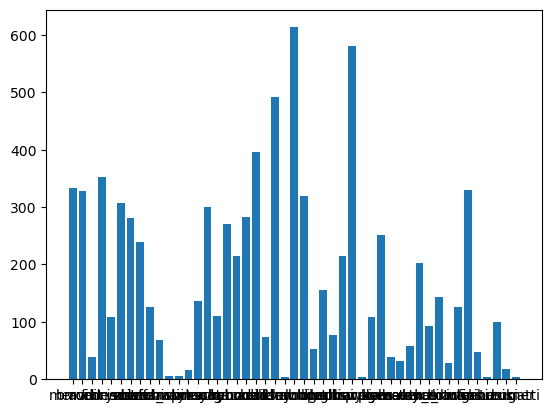

In [46]:
companies_counts = {}
for i in car_df["make"]:
    if i in companies_counts:
        companies_counts[i] += 1
    else:
        companies_counts[i] = 1

plt.bar(companies_counts.keys(), companies_counts.values())
plt.show()

Model

In [70]:
from sklearn.model_selection import train_test_split

y = car_df["msrp"]
X = car_df.drop("msrp", axis=1)

X_train_t, X_test, y_train_t, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_t, y_train_t, test_size=0.25, random_state=42)

y_train, y_valid, y_test = np.log(y_train + 1), np.log(y_valid + 1), np.log(y_test + 1)
